# See what JN will run with Colab; does Github see all .ipynb files?

(file-types:notebooks)=
# Jupyter Notebook files
## A grab-bag of various JN cells that do a broad variety of computations
- This will expand with examples relevant to EBMUD.
  - Time series: water flows, water demand.
  - maps with real-time data updates
  - PDE solutions of water pressure effects on pipe fracture

You can create content with Jupyter notebooks.
For example, the content for the current page is contained in {download}`this notebook file <./notebooks.ipynb>`.

```{margin}
If you'd like to write in plain-text files, but still keep a notebook structure, you can write
Jupyter notebooks with MyST Markdown, which are then automatically converted to notebooks.
See [](./myst-notebooks.md) for more details.
```

Jupyter Book supports all Markdown that is supported by Jupyter Notebook.
This is mostly a flavour of Markdown called [CommonMark Markdown](https://commonmark.org/) with minor modifications.
For more information about writing Jupyter-flavoured Markdown in Jupyter Book, see [](./markdown.md).

## Code blocks and image outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

First Example: install and load libraries;

In [1]:
%pip install pandas
import pandas as pd

In [2]:
# list of strings
lst = ['ChatGPT', 'will', 'write', 'description', 
            'portal', 'for', 'Geeks']
  
# Calling Pandas DataFrame constructor on list
df = pd.DataFrame(lst)
df

,0
0,ChatGPT
1,will
2,write
3,description
4,portal
5,for
6,Geeks


In [3]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

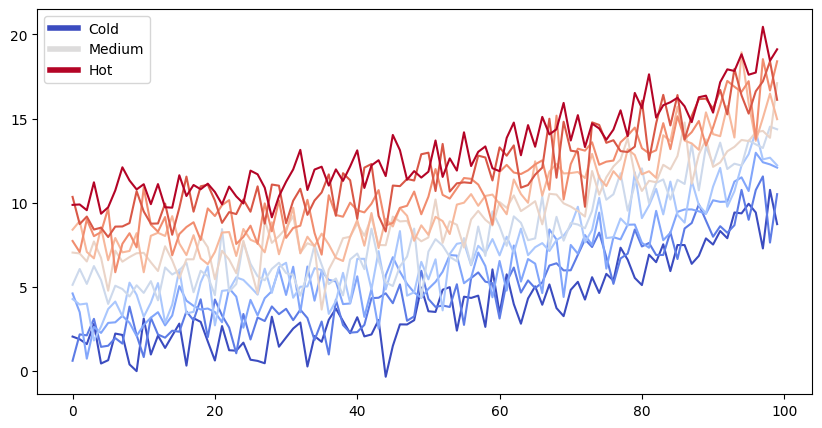

In [4]:
# show temperature
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

Note that the image above is captured and displayed in your site.

[Text(0.5, 1.0, 'Smoother linez')]

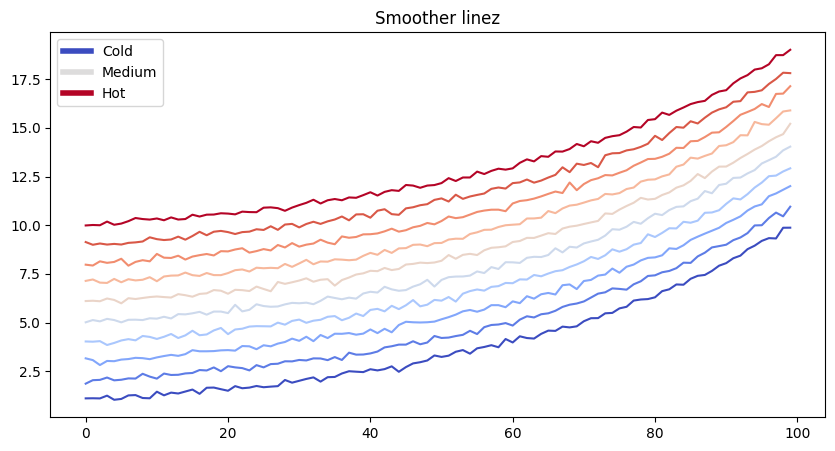

In [3]:
# rewritten
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + .1*np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
ax.set(title="Smoother linez")

```{margin} **You can also pop out content to the side!**
For more information on how to do this,
check out the {ref}`layout/sidebar` section.
```

## Removing content before publishing

You can also remove some content before publishing your book to the web. 
For reference, {download}`you can download the notebook content for this page <notebooks.ipynb>`.

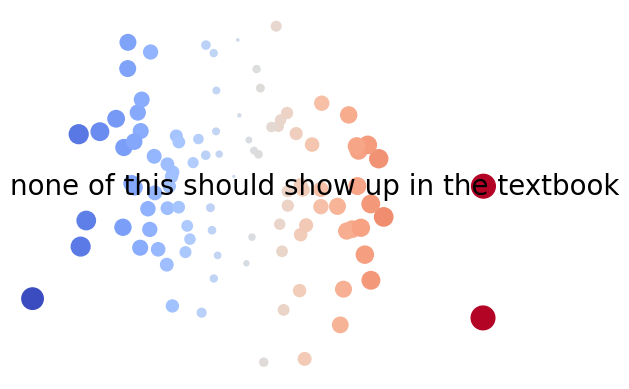

In [4]:
thisvariable = "This could show leaks or flows"

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

You can **remove only the code** so that images and other output still show up.

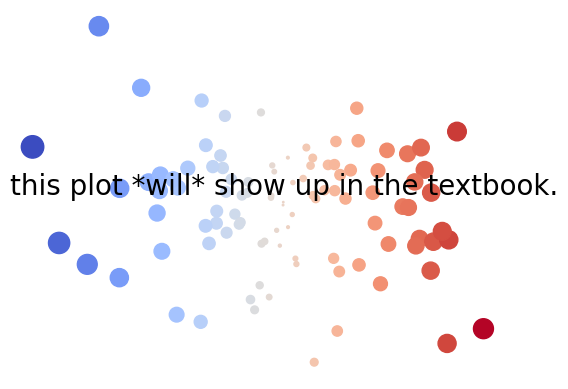

In [5]:
thisvariable = "this plot *will* show up in the textbook."

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

Which works well if you'd like to quickly display cell output without cluttering your content with code.
This works for any cell output, like a Pandas DataFrame.

In [5]:
import pandas as pd
pd.DataFrame([['hi', 'there'], ['this', 'is'], ['a', 'DataFrame']], columns=['Word A', 'Word B'])

,Word A,Word B
0,hi,there
1,this,is
2,a,DataFrame


See {ref}`hiding/remove-content` for more information about hiding and removing content.

## Interactive outputs

We can do the same for *interactive* material. Below we'll display a map
using [folium](https://python-visualization.github.io/folium/). When your book is built,
the code for creating the interactive map is retained.

```{margin}
**This will only work for some packages.** They need to be able to output standalone
HTML/Javascript, and not
depend on an underlying Python kernel to work.
```

In [6]:
import folium
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

m

## Rich outputs from notebook cells

Because notebooks have rich text outputs, you can store these in
your Jupyter Book as well! For example, here is the command line help
menu, see how it is nicely formatted.

In [8]:
!jupyter-book build --help

Usage: jupyter-book build [OPTIONS] PATH_SOURCE

  Convert your book's or page's content to HTML or a PDF.

Options:
  --path-output TEXT              Path to the output artifacts
  --config TEXT                   Path to the YAML configuration file
                                  (default: PATH_SOURCE/_config.yml)
  --toc TEXT                      Path to the Table of Contents YAML file
                                  (default: PATH_SOURCE/_toc.yml)
  -W, --warningiserror            Error on warnings.
  -n, --nitpick                   Run in nit-picky mode, to generates warnings
                                  for all missing references.
  --keep-going                    With -W, do not stop the build on the first
                                  warning, instead error on build completion
  --all                           Re-build all pages. The default is to only
                                  re-build pages that are new/changed since
                                  the l

And here is an error. You can mark notebook cells as "expected to error" by adding a
`raises-exception` tag to them.

In [10]:
#this_will_error

NameError: name 'this_will_error' is not defined

##### chat
Write a technical description of how a water purification plant works


## More features with Jupyter notebooks

There are many other features of Jupyter notebooks to take advantage of,
such as automatically generating Binder links for notebooks or connecting your content with a kernel in the cloud.
For more information browse the pages in this site, and [](content:code-outputs) in particular.

To make interaction with CE112 cells as seamless as possible, we will use **Colab**

In [7]:
import subprocess

# List of files to process
files = ['WaterNet/5-Sustainability_and_Resilience/Climate Change and the Water-Energy Nexus.md', './WaterNet/5-Sustainability_and_Resilience/Sustainability and Resilience--Overview and Innovations.md', './WaterNet/5-Sustainability_and_Resilience/Sustainability.md', './WaterNet/6-Financing_Water/Finance.md']

# Command to run on each file: try to change .md to .ipynb
#command = '!jupytext --to myst'

for file in files:
    # Run the command on the current file
   # subprocess.run([command, file])
    
    


FileNotFoundError: [Errno 2] No such file or directory: '!jupytext --to myst'

In [32]:
#!Jupytext --to myst

!Jupytext --to myst


In [9]:
!which Jupytext

/Library/Frameworks/Python.framework/Versions/3.10/bin/Jupytext


In [10]:
subprocess

<module 'subprocess' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/subprocess.py'>

In [25]:
subprocess.run

<function subprocess.run(*popenargs, input=None, capture_output=False, timeout=None, check=False, **kwargs)>

In [31]:
#!jupytext -- to myst

Traceback (most recent call last):
  File "/Users/johngage/opt/miniconda3/bin/jupytext", line 8, in <module>
    sys.exit(jupytext())
  File "/Users/johngage/opt/miniconda3/lib/python3.9/site-packages/jupytext/cli.py", line 397, in jupytext
    raise ValueError(
ValueError: Please provide one of --to, --output, --set-formats, --sync, --pipe, --diff, --check, --update-metadata, --format-options, --set-kernel or --execute


In [33]:
#import sys
#!{sys.executable} -m pip install PyPDF2

SyntaxError: invalid syntax (4141657798.py, line 1)

In [38]:
# rewritten to update the outdated function commands#
#use urllib to download a PDF file from a remote web site and extract the text using the PyPDF2 library:
import urllib.request
#import pypdf2

# download the pdf file
#url = 'https://www.example.com/document.pdf'
#url = 'https://bcourses.berkeley.edu/courses/1516536/files/folder/Module%200%20%20Introduction?preview=83922060'
#url = 'https://innovation.luskin.ucla.edu/wp-content/uploads/2019/03/LA_County_Community_Water_Systems.pdf'
url =  'file:///Users/johngage/Downloads/Achieving_SDG_6_The_Need_for_Local_Centres_of_WASH_Expertise_and_How_to_Do_It.pdf'
urllib.request.urlretrieve(url, 'document.pdf')

# open the pdf file
with open('document.pdf', 'rb') as file:
    # create pdf reader object
    reader = PyPDF2.PdfReader(file)
    # get the first page
    page = reader.pages(0)
    # extract text from page
    print(page.extractText())


TypeError: '_VirtualList' object is not callable

In [3]:
#!pip install PyPDF2

In [4]:
import PyPDF2

In [10]:
!pwd

/Users/johngage/JBook


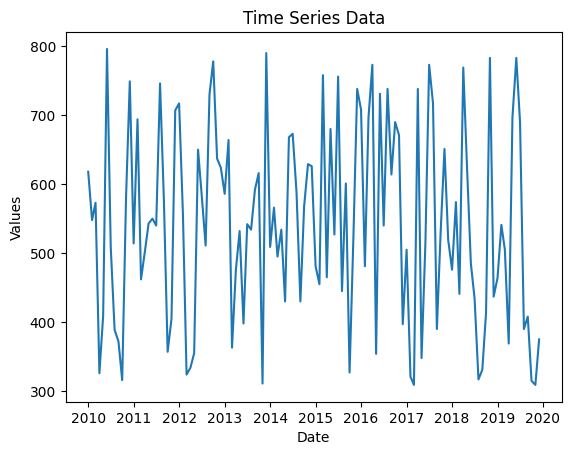

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
date_range = np.arange('2010-01-01', '2020-01-01', dtype='datetime64[M]')
data = np.random.randint(300, 800, size=len(date_range))

# Create line graph
plt.plot(date_range, data)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.show()


In [13]:
type(data)

numpy.ndarray

In [15]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
a[2, 2] = 10
print(a)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]


In [17]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
a[:, 1] = [11, 12, 13]
print(a)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1 11  3]
 [ 4 12  6]
 [ 7 13  9]]


In [28]:
data.size

120

In [30]:
data[data > 630]= 630
data

array([618, 548, 573, 326, 409, 630, 509, 389, 372, 316, 581, 630, 514,
       630, 462, 502, 543, 550, 540, 630, 576, 357, 405, 630, 630, 555,
       324, 334, 355, 630, 583, 511, 630, 630, 630, 624, 586, 630, 363,
       476, 532, 398, 542, 534, 592, 616, 311, 630, 509, 566, 495, 534,
       430, 630, 630, 588, 430, 568, 629, 626, 481, 455, 630, 465, 630,
       527, 630, 445, 601, 327, 525, 630, 630, 481, 630, 630, 354, 630,
       540, 630, 614, 630, 630, 397, 505, 321, 309, 630, 348, 515, 630,
       630, 390, 529, 630, 519, 476, 574, 441, 630, 625, 485, 434, 317,
       331, 414, 630, 437, 464, 541, 505, 369, 630, 630, 630, 390, 408,
       315, 309, 375])

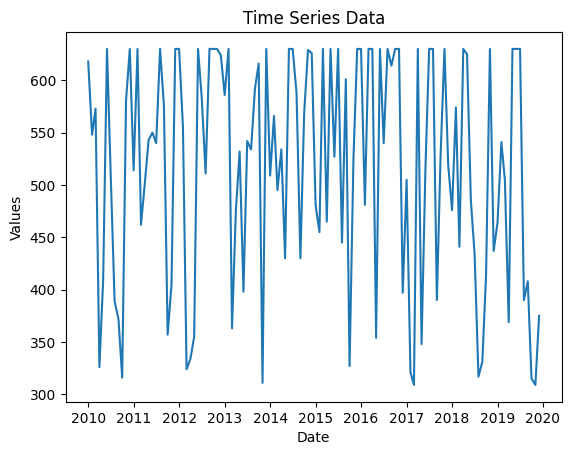

In [32]:
# Create line graph
plt.plot(date_range, data)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.show()


In [42]:
import sys
!{sys.executable} -m pip install pdfminer3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00


In [46]:
%pip install pdfminer3k

In [48]:
#!pip freeze

In [51]:
%pip install pdfminer3k --user

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [49]:
import sys
sys.path.append('/Users/johngage/.pyenv/versions/3.11.1/envs/JBook/lib/python3.11/site-packages')


In [50]:
from pdfminer3k.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer3k.converter import TextConverter
from pdfminer3k.layout import LAParams
from pdfminer3k.pdfpage import PDFPage

from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    with open(path, 'rb') as fp:
        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True):
            interpreter.process_page(page)

    text = retstr.getvalue()

    device.close()
    retstr.close()

    return text

print(convert_pdf_to_txt('/Users/johngage/Downloads/10-19 Lecture.pdf'))


ModuleNotFoundError: No module named 'pdfminer3k'

In [12]:
!python3 --version

Python 3.10.9


In [13]:
#pyenv virtualenv 'Python 3.11.1' Chat
!which python3

/Library/Frameworks/Python.framework/Versions/3.10/bin/python3


In [15]:
%pip list

Package                       Version
----------------------------- -----------
alabaster                     0.7.13
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asttokens                     2.2.1
attrs                         21.4.0
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.1
bokeh                         2.4.3
boltons                       21.0.0
branca                        0.6.0
cached-property               1.5.2
cachetools                    5.2.1
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
colorcet                      3.0.1
comm    

In [16]:
!which python3


/Library/Frameworks/Python.framework/Versions/3.10/bin/python3


In [59]:
!python3 --version


Python 3.11.1


## Start new JN for EBMUD